## Рабочая тетрадь №3 Меджидов Магомедпаша Султанович БФБО-01-22 

Курс № 1
Семестр № 2


## Задание 1


In [1]:
def qZ(x,y):
    return (x - 3 * y) / (2 * x**2 + 2 * y **2 +1)

def qSumZ(Z):
    return sum(Z)

def exchangeSheme(oldX, oldY, sortedId):
    X = [0 for i in range(4)]
    Y = [0 for i in range(4)]

    X[2] = oldX[sortedId[2]]
    X[3] = oldX[sortedId[2]]

    X[0] = oldX[sortedId[0]]

    X[1] = oldX[sortedId[1]]
    
    Y[0] = oldY[sortedId[2]]
    Y[1] = oldY[sortedId[2]]

    Y[2] = oldY[sortedId[2]]
    Y[3] = oldY[sortedId[1]]

    return X,Y

def sorting(Z):
    sortedId = sorted(range(len(Z)), key= lambda k: Z[k])
    return sortedId

def evoStep(X,Y,Z):
    _, minId = min((value, id) for (id, value) in enumerate(Z))
    
    X = X[:]
    Y = Y[:]
    Z = Z[:]
    
    X.pop(minId)
    Y.pop(minId)
    Z.pop(minId)


    return X, Y, Z 

def evoSteps(X, Y, stepsNum = 4):
    results = []

    for i in range(4):
        arrZ = [qZ(x, Y[i]) for i, x in enumerate(X)]

        X, Y, Z = evoStep(X, Y, arrZ)

        X,Y = exchangeSheme(X,Y, sorting(Z))

        results.append([X, Y, qSumZ(arrZ), arrZ])

    return X, Y, results


X = [-1, 0, 2, 3]
Y = [0, 1, -2, 2]

results = evoSteps(X,Y)
for i in range(len(results[2])):
    print(f'max_{i + 1}_step: {results[2][i][2]}')

qualityArrZ = []
for i in range(len(results[2])):
    qualityArrZ += results[2][i][3]

print(f'max Z:      {max(qualityArrZ)}')

max_1_step: -0.9738562091503267
max_2_step: 1.0231729055258465
max_3_step: 1.7290552584670231
max_4_step: 1.8663101604278074
max Z:      0.47058823529411764


## Задание 2

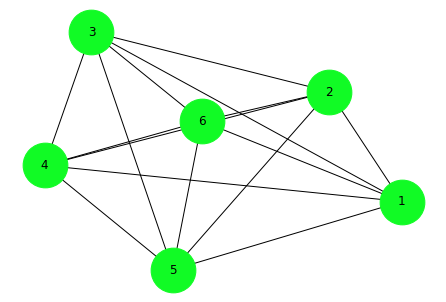

In [14]:
import networkx as nx
from math import e

distances = [
    (1, 2, 19),
    (1, 3, 39),
    (1, 4, 35),
    (1, 5, 26),
    (1, 6, 33),
    (2, 3, 26),
    (2, 4, 33),
    (2, 5, 37),
    (2, 6, 14),
    (3, 4, 22),
    (3, 5, 41),
    (3, 6, 21),
    (4, 5, 22),
    (4, 6, 19),
    (5, 6, 24)
]

V = [1, 4, 2, 3, 5, 6, 1]
Z = [
    (5,2),
    (4,5),
    (2,3),
    (3,4)
]

P = [88,54,24,64]

T = 100

def probability(delta, T):
    return 100 * e ** (-delta / T)

def reductTemp(prevT):
    nextT = 0.5 * prevT
    
    return nextT

graph = nx.Graph()
graph.add_weighted_edges_from(distanse)
nx.draw_kamada_kawai(graph, node_color = '#11fb25', node_size = 2000, with_labels=True)

Лучший выбранный маршрут: [1, 2, 5, 4, 3, 6, 1]
 Длинна лучшего выбранного маршрута: 154
 Длины всех рассмотренных маршрутов: [192, 163, 172, 154, 169]


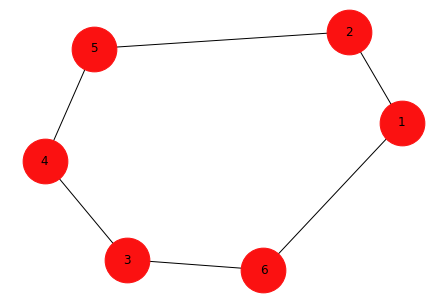

In [15]:
def edgeLength(i, j, distances, roundTrip = True):
    if roundTrip:
        return max([(item[2] if (item[0] == i and item[1] == j) or (item[1] == i and item[0] == j) else -1) 
                    for item in distances])
    else:
        return max([(item[2] if (item[0] == i and item[1] == j) else -1) for item in distances])
    

def routeLength(V, distances):
    edges = []
    
    for i in range(len(V) - 1):
        edges.append(edgeLength(V[i], V[i+1], distances))
    return sum(edges)

def routeOneReplacement(arrV, Z, replacementByName = True):
    decrement = 1 if replacementByName else 0
    arrV[Z[0] - decrement], arrV[Z[1] - decrement] = arrV[Z[1] - decrement], arrV[Z[0] - decrement]
    return arrV

def routeReplacment(V, Z):
    for z in Z:
        V = routeOneReplacement(V, z)
    return V

def chooseRoute(distances, V, Z, T, P):
    sumLength = routeLength(V, distances) 
    arrSum = [sumLength] 
    
    # циклы методом отжига
    for i in range(len(Z)):
        newV = routeOneReplacement(V[:], Z[i]) 
        newS = routeLength(newV, distances) 
        arrSum.append(newS)
        deltaS = newS - sumLength 
        
        if deltaS > 0:
            p = probability(deltaS, T) 
            if p > P[i]:
                V = newV
                sumLength = newS
        else:
            V = newV
            sumLength = newS
        
        T = reductTemp(T)
        
    return V, arrSum


def drawRouteGraph(distances, bestRoute):
    newDistances = []

    for i in range(len(bestRoute) - 1):
        for distance in distances:
            if distance[0] == bestRoute[i] and distance[1] == bestRoute[i + 1] or distance[1] == bestRoute[i] and distance[0] == bestRoute[i + 1]:
                newDistances.append(distance)
    graph = nx.Graph()
    
    graph.add_weighted_edges_from(newDistances) 

    nx.draw_kamada_kawai(graph, node_color = '#fb1111', node_size = 2000, with_labels = True)
    
bestRoute, arrLength = chooseRoute(distances, V, Z, T, P)
print(f'Лучший выбранный маршрут: {bestRoute}\n',
      f'Длинна лучшего выбранного маршрута: {routeLength(bestRoute, distances)}\n',
      f'Длины всех рассмотренных маршрутов: {arrLength}')
drawRouteGraph(distances, bestRoute) 